<a href="https://colab.research.google.com/github/Amacchiavelloe/HITO1_GESTIONFINANCIERA/blob/main/EFICIENCIA_ONG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar paquetes

In [2]:
install.packages("readxl")
install.packages("openxlsx")
install.packages("frontier")
install.packages("deaR")
install.packages("lmtest")
install.packages("writexl")
install.packages("tibble")
install.packages("reshape2")
install.packages("knitr")
install.packages("kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘zoo’, ‘bdsmatrix’, ‘collapse’, ‘sandwich’, ‘maxLik’, ‘Rdpack’, ‘micEcon’, ‘lmtest’, ‘moments’, ‘Formula’, ‘miscTools’, ‘plm’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘lpSolve’, ‘plotly’, ‘igraph’, ‘writexl’, ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’

In [ ]:
# Instalar las librerías necesarias
install.packages("usethis")
install.packages("git2r")

# Cargar las librerías
library(usethis)
library(git2r)

Instalar librerías

In [3]:
library(lmtest)
library(frontier)
library(openxlsx)
library(readxl)
library(deaR)
library(dplyr)
library( "plm" )
library(ggplot2)
library(scales)
library(knitr)
library(kableExtra)
library(reshape2)
library(tibble)
library(writexl)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: micEcon


If you have questions, suggestions, or comments regarding one of the 'micEcon' packages, please use a forum or 'tracker' at micEcon's R-Forge site:
https://r-forge.r-project.org/projects/micecon/


Please cite the 'frontier' package as:
Tim Coelli and Arne Henningsen (2013). frontier: Stochastic Frontier Analysis. R package version 1.1. http://CRAN.R-Project.org/package=frontier.

If you have questions, suggestions, or comments regarding the 'frontier' package, please use a forum or 'tracker' at frontier's R-Forge site:
https://r-forge.r-project.org/projects/frontier/


Attaching package: ‘deaR’


The following object is masked from ‘package:frontier’:

    efficiencies



Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead



Attaching package: ‘kableExt

Cargar base de datos y estadística descriptiva de los datos

In [11]:
#Cargar la base de datos
Datos_para_ONGs <- read_excel("/content/Datos_para_ONGs.xlsx")
PFT <- Datos_para_ONGs
#View(Datos_para_ONGs)
#NUMEROS ENTEROS EN MILL
Datos_para_ONGs <- Datos_para_ONGs %>%
  mutate(across(where(is.numeric), round))
#View(Datos_para_ONGs)
datos_2018s <- subset(Datos_para_ONGs, AÑO == 2018)
datos_2019s <- subset(Datos_para_ONGs, AÑO == 2019)
datos_2020s <- subset(Datos_para_ONGs, AÑO == 2020)

summary(datos_2018s[c("INGRESOS_OPERACIONALES_MILL", "GASTOS_OPERACIONALES_MILL","NUMERO_DE_TRABAJADORES",
                     "NUMERO_DE_VOLUNTARIOS","NUMERO_DE_BENEFICIARIOS","NUMERO_DE_PROYECTOS")])
summary(datos_2019s[c("INGRESOS_OPERACIONALES_MILL", "GASTOS_OPERACIONALES_MILL","NUMERO_DE_TRABAJADORES",
                     "NUMERO_DE_VOLUNTARIOS","NUMERO_DE_BENEFICIARIOS","NUMERO_DE_PROYECTOS")])
summary(datos_2020s[c("INGRESOS_OPERACIONALES_MILL", "GASTOS_OPERACIONALES_MILL","NUMERO_DE_TRABAJADORES",
                     "NUMERO_DE_VOLUNTARIOS","NUMERO_DE_BENEFICIARIOS","NUMERO_DE_PROYECTOS")])



 INGRESOS_OPERACIONALES_MILL GASTOS_OPERACIONALES_MILL NUMERO_DE_TRABAJADORES
 Min.   :   17398            Min.   :   14402          Min.   :  1.00        
 1st Qu.:  118826            1st Qu.:  125788          1st Qu.:  8.25        
 Median :  319914            Median :  293682          Median : 16.50        
 Mean   :  997939            Mean   : 1001278          Mean   : 61.10        
 3rd Qu.:  863406            3rd Qu.:  859944          3rd Qu.: 42.00        
 Max.   :13905789            Max.   :15665289          Max.   :923.00        
 NUMERO_DE_VOLUNTARIOS NUMERO_DE_BENEFICIARIOS NUMERO_DE_PROYECTOS
 Min.   :    0.00      Min.   :    19.0        Min.   : 1.000     
 1st Qu.:    3.00      1st Qu.:   166.5        1st Qu.: 2.250     
 Median :   20.50      Median :   776.5        Median : 5.000     
 Mean   :  555.88      Mean   :  9191.3        Mean   : 5.654     
 3rd Qu.:   76.25      3rd Qu.:  4160.0        3rd Qu.: 6.000     
 Max.   :37827.00      Max.   :168555.0        Max. 

 INGRESOS_OPERACIONALES_MILL GASTOS_OPERACIONALES_MILL NUMERO_DE_TRABAJADORES
 Min.   :    824             Min.   :      17          Min.   :  1.00        
 1st Qu.: 108516             1st Qu.:  108080          1st Qu.:  8.00        
 Median : 287664             Median :  233445          Median : 16.50        
 Mean   : 825442             Mean   :  852820          Mean   : 50.95        
 3rd Qu.: 752690             3rd Qu.:  742932          3rd Qu.: 39.25        
 Max.   :8966699             Max.   :10192749          Max.   :770.00        
 NUMERO_DE_VOLUNTARIOS NUMERO_DE_BENEFICIARIOS NUMERO_DE_PROYECTOS
 Min.   :   0.0        Min.   :     1.0        Min.   : 1.000     
 1st Qu.:   3.0        1st Qu.:   133.8        1st Qu.: 2.750     
 Median :  18.5        Median :   661.0        Median : 4.000     
 Mean   : 141.7        Mean   :  7126.0        Mean   : 5.987     
 3rd Qu.:  75.5        3rd Qu.:  3190.2        3rd Qu.: 7.000     
 Max.   :4655.0        Max.   :168555.0        Max. 

 INGRESOS_OPERACIONALES_MILL GASTOS_OPERACIONALES_MILL NUMERO_DE_TRABAJADORES
 Min.   :       0            Min.   :     724          Min.   :  1.00        
 1st Qu.:  115542            1st Qu.:  130401          1st Qu.:  9.25        
 Median :  331638            Median :  368968          Median : 16.00        
 Mean   :  945403            Mean   :  935995          Mean   : 41.54        
 3rd Qu.:  923888            3rd Qu.:  935581          3rd Qu.: 36.50        
 Max.   :10991933            Max.   :10572761          Max.   :561.00        
 NUMERO_DE_VOLUNTARIOS NUMERO_DE_BENEFICIARIOS NUMERO_DE_PROYECTOS
 Min.   :   0.00       Min.   :     1.0        Min.   : 1.000     
 1st Qu.:   2.00       1st Qu.:    91.8        1st Qu.: 2.000     
 Median :  10.00       Median :   732.0        Median : 4.000     
 Mean   :  97.45       Mean   : 11224.2        Mean   : 6.756     
 3rd Qu.:  37.75       3rd Qu.:  4743.5        3rd Qu.: 7.000     
 Max.   :3157.00       Max.   :372710.0        Max. 

Eliminar outliers?

In [12]:
Datos_para_ONGs <- subset(Datos_para_ONGs, !(ID %in% c(159, 213, 220, 131))) #para eliminar ONG con mas de 160 mil beneficiarios, outlier


Agrupar ONG por años

In [13]:
# Seleccionar datos por año
datos_2018 <- subset(Datos_para_ONGs, AÑO == 2018)
datos_2019 <- subset(Datos_para_ONGs, AÑO == 2019)
datos_2020 <- subset(Datos_para_ONGs, AÑO == 2020)

OPCION 1 PARA NORMALIZAR EN PERCENTILES

In [ ]:
normalize_percentiles <- function(column) {
  # Calcular los cuantiles de la columna
  cuantiles <- quantile(column, probs = seq(0, 1, by = 0.01), na.rm = TRUE)
  # Asignar cada valor al percentil correspondiente
  percentil_columna <- findInterval(column, cuantiles, all.inside = TRUE) / length(cuantiles) * 100
  return(percentil_columna)
}

Datos_para_ONGs <- Datos_para_ONGs %>%
  mutate(
    INGRESOS_OPERACIONALES_MILL = normalize_percentiles(INGRESOS_OPERACIONALES_MILL),
    GASTOS_OPERACIONALES_MILL = normalize_percentiles(GASTOS_OPERACIONALES_MILL),
    NUMERO_DE_TRABAJADORES = normalize_percentiles(NUMERO_DE_TRABAJADORES),
    NUMERO_DE_VOLUNTARIOS = normalize_percentiles(NUMERO_DE_VOLUNTARIOS),
    NUMERO_DE_PROYECTOS = normalize_percentiles(NUMERO_DE_PROYECTOS),
    NUMERO_DE_BENEFICIARIOS = normalize_percentiles(NUMERO_DE_BENEFICIARIOS)
  )

datos_2018 <- datos_2018 %>%
    mutate(
    INGRESOS_OPERACIONALES_MILL = normalize_percentiles(INGRESOS_OPERACIONALES_MILL),
    GASTOS_OPERACIONALES_MILL = normalize_percentiles(GASTOS_OPERACIONALES_MILL),
    NUMERO_DE_TRABAJADORES = normalize_percentiles(NUMERO_DE_TRABAJADORES),
    NUMERO_DE_VOLUNTARIOS = normalize_percentiles(NUMERO_DE_VOLUNTARIOS),
    NUMERO_DE_PROYECTOS = normalize_percentiles(NUMERO_DE_PROYECTOS),
    NUMERO_DE_BENEFICIARIOS = normalize_percentiles(NUMERO_DE_BENEFICIARIOS)
  )
datos_2019 <- datos_2019 %>%
    mutate(
    INGRESOS_OPERACIONALES_MILL = normalize_percentiles(INGRESOS_OPERACIONALES_MILL),
    GASTOS_OPERACIONALES_MILL = normalize_percentiles(GASTOS_OPERACIONALES_MILL),
    NUMERO_DE_TRABAJADORES = normalize_percentiles(NUMERO_DE_TRABAJADORES),
    NUMERO_DE_VOLUNTARIOS = normalize_percentiles(NUMERO_DE_VOLUNTARIOS),
    NUMERO_DE_PROYECTOS = normalize_percentiles(NUMERO_DE_PROYECTOS),
    NUMERO_DE_BENEFICIARIOS = normalize_percentiles(NUMERO_DE_BENEFICIARIOS)
  )
datos_2020 <- datos_2020 %>%
    mutate(
    INGRESOS_OPERACIONALES_MILL = normalize_percentiles(INGRESOS_OPERACIONALES_MILL),
    GASTOS_OPERACIONALES_MILL = normalize_percentiles(GASTOS_OPERACIONALES_MILL),
    NUMERO_DE_TRABAJADORES = normalize_percentiles(NUMERO_DE_TRABAJADORES),
    NUMERO_DE_VOLUNTARIOS = normalize_percentiles(NUMERO_DE_VOLUNTARIOS),
    NUMERO_DE_PROYECTOS = normalize_percentiles(NUMERO_DE_PROYECTOS),
    NUMERO_DE_BENEFICIARIOS = normalize_percentiles(NUMERO_DE_BENEFICIARIOS)
  )


OPCION 2 PARA NORMALIZAR EN PERCENTILES

In [ ]:
normalize_percentile <- function(column) {
  # Calcular el percentil de cada valor en la columna
  ranks <- rank(column, ties.method = "average")  # Rank con manejo de empates
  percentiles <- (ranks - 1) / length(column) * 100  # Convertir ranks a percentiles
  return(percentiles)
}

Datos_para_ONGs <- Datos_para_ONGs %>%
  mutate(
    INGRESOS_OPERACIONALES_MILL = normalize_percentile(INGRESOS_OPERACIONALES_MILL),
    GASTOS_OPERACIONALES_MILL = normalize_percentile(GASTOS_OPERACIONALES_MILL),
    NUMERO_DE_TRABAJADORES = normalize_percentile(NUMERO_DE_TRABAJADORES),
    NUMERO_DE_VOLUNTARIOS = normalize_percentile(NUMERO_DE_VOLUNTARIOS),
    NUMERO_DE_PROYECTOS = normalize_percentile(NUMERO_DE_PROYECTOS),
    NUMERO_DE_BENEFICIARIOS = normalize_percentile(NUMERO_DE_BENEFICIARIOS)
  )

#View(Datos_para_ONGs)

OPCION 3 PARA NORMALIZAR EN PERCENTILES

In [ ]:
normalize_quantile <- function(column) {
  # Calcular cuantiles para cada valor en la columna
  percentiles <- ecdf(column)(column) * 100  # Utiliza la función de distribución empírica
  return(percentiles)
}
Datos_para_ONGs <- Datos_para_ONGs %>%
  mutate(
    INGRESOS_OPERACIONALES_MILL = normalize_quantile(INGRESOS_OPERACIONALES_MILL),
    GASTOS_OPERACIONALES_MILL = normalize_quantile(GASTOS_OPERACIONALES_MILL),
    NUMERO_DE_TRABAJADORES = normalize_quantile(NUMERO_DE_TRABAJADORES),
    NUMERO_DE_VOLUNTARIOS = normalize_quantile(NUMERO_DE_VOLUNTARIOS),
    NUMERO_DE_PROYECTOS = normalize_quantile(NUMERO_DE_PROYECTOS),
    NUMERO_DE_BENEFICIARIOS = normalize_quantile(NUMERO_DE_BENEFICIARIOS)
  )
View(Datos_para_ONGs)


Normalizar variables en escala del 1 al 100 para todos los años.

Normalizar para el 2018

In [ ]:
datos_2018$INGRESOS_OPERACIONALES_MILL <- rescale(datos_2018$INGRESOS_OPERACIONALES_MILL, to = c(1, 100))
datos_2018$GASTOS_OPERACIONALES_MILL <- rescale(datos_2018$GASTOS_OPERACIONALES_MILL, to = c(1, 100))
datos_2018$NUMERO_DE_TRABAJADORES <- rescale(datos_2018$NUMERO_DE_TRABAJADORES, to = c(1, 100))
datos_2018$NUMERO_DE_VOLUNTARIOS<- rescale(datos_2018$NUMERO_DE_VOLUNTARIOS, to = c(1, 100))
datos_2018$NUMERO_DE_PROYECTOS <- rescale(datos_2018$NUMERO_DE_PROYECTOS, to = c(1, 100))
datos_2018$NUMERO_DE_BENEFICIARIOS<- rescale(datos_2018$NUMERO_DE_BENEFICIARIOS, to = c(1, 100))

Normalizar para el 2019

In [ ]:
datos_2019$INGRESOS_OPERACIONALES_MILL <- rescale(datos_2019$INGRESOS_OPERACIONALES_MILL, to = c(1, 100))
datos_2019$GASTOS_OPERACIONALES_MILL <- rescale(datos_2019$GASTOS_OPERACIONALES_MILL, to = c(1, 100))
datos_2019$NUMERO_DE_TRABAJADORES <- rescale(datos_2019$NUMERO_DE_TRABAJADORES, to = c(1, 100))
datos_2019$NUMERO_DE_VOLUNTARIOS<- rescale(datos_2019$NUMERO_DE_VOLUNTARIOS, to = c(1, 100))
datos_2019$NUMERO_DE_PROYECTOS <- rescale(datos_2019$NUMERO_DE_PROYECTOS, to = c(1, 100))
datos_2019$NUMERO_DE_BENEFICIARIOS<- rescale(datos_2019$NUMERO_DE_BENEFICIARIOS, to = c(1, 100))

Normalizar para el 2020

In [ ]:
datos_2020$INGRESOS_OPERACIONALES_MILL <- rescale(datos_2020$INGRESOS_OPERACIONALES_MILL, to = c(1, 100))
datos_2020$GASTOS_OPERACIONALES_MILL <- rescale(datos_2020$GASTOS_OPERACIONALES_MILL, to = c(1, 100))
datos_2020$NUMERO_DE_TRABAJADORES <- rescale(datos_2020$NUMERO_DE_TRABAJADORES, to = c(1, 100))
datos_2020$NUMERO_DE_VOLUNTARIOS<- rescale(datos_2020$NUMERO_DE_VOLUNTARIOS, to = c(1, 100))
datos_2020$NUMERO_DE_PROYECTOS <- rescale(datos_2020$NUMERO_DE_PROYECTOS, to = c(1, 100))
datos_2020$NUMERO_DE_BENEFICIARIOS<- rescale(datos_2020$NUMERO_DE_BENEFICIARIOS, to = c(1, 100))

Hacer regresiones para ver retornos a escala

In [ ]:
# Crear el modelo de regresión de numero de poryectos con ln para el 2018
regresion_log_proyectos_18 <- lm(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                      log(GASTOS_OPERACIONALES_MILL) +
                      log(NUMERO_DE_TRABAJADORES) +
                      log(NUMERO_DE_VOLUNTARIOS),
                    data = datos_2018)
# Crear el modelo de regresión de numero de beneficiarios con ln para el 2018
regresion_log_beneficiarios_18 <- lm(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                      log(GASTOS_OPERACIONALES_MILL) +
                      log(NUMERO_DE_TRABAJADORES) +
                      log(NUMERO_DE_VOLUNTARIOS),
                    data = datos_2018)
# Crear el modelo de regresión de numero de poryectos con ln para el 2019
regresion_log_proyectos_19 <- lm(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                                   log(GASTOS_OPERACIONALES_MILL) +
                                   log(NUMERO_DE_TRABAJADORES) +
                                   log(NUMERO_DE_VOLUNTARIOS),
                                 data = datos_2019)
# Crear el modelo de regresión de numero de beneficiarios con ln para el 2019
regresion_log_beneficiarios_19 <- lm(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                                       log(GASTOS_OPERACIONALES_MILL) +
                                       log(NUMERO_DE_TRABAJADORES) +
                                       log(NUMERO_DE_VOLUNTARIOS),
                                     data = datos_2019)
# Crear el modelo de regresión de numero de proyectos con ln para el 2020
regresion_log_proyectos_20 <- lm(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                                   log(GASTOS_OPERACIONALES_MILL) +
                                   log(NUMERO_DE_TRABAJADORES) +
                                   log(NUMERO_DE_VOLUNTARIOS),
                                 data = datos_2020)
# Crear el modelo de regresión de numero de beneficiarios con ln para el 2020
regresion_log_beneficiarios_20 <- lm(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                                       log(GASTOS_OPERACIONALES_MILL) +
                                       log(NUMERO_DE_TRABAJADORES) +
                                       log(NUMERO_DE_VOLUNTARIOS),
                                     data = datos_2020)
#18
coeficientes_proy18 <- coef(regresion_log_proyectos_18)
coeficientes_benef18 <- coef(regresion_log_beneficiarios_18)
suma_coeficientes_proy18 <- sum(coeficientes_proy18[-1])
suma_coeficientes_benef18 <- sum(coeficientes_benef18[-1])
#19
coeficientes_proy19 <- coef(regresion_log_proyectos_19)
coeficientes_benef19 <- coef(regresion_log_beneficiarios_19)
suma_coeficientes_proy19 <- sum(coeficientes_proy19[-1])
suma_coeficientes_benef19 <- sum(coeficientes_benef19[-1])
#20
coeficientes_proy20 <- coef(regresion_log_proyectos_20)
coeficientes_benef20 <- coef(regresion_log_beneficiarios_20)
suma_coeficientes_proy20 <- sum(coeficientes_proy20[-1])
suma_coeficientes_benef20 <- sum(coeficientes_benef20[-1])

print(paste("Retorno a escala de proy18:", round(suma_coeficientes_proy18, 2)))
print(paste("Retorno a escala de benef18:", round(suma_coeficientes_benef18,2)))
print(paste("Retorno a escala de proy19:", round(suma_coeficientes_proy19, 2)))
print(paste("Retorno a escala de benef19:", round(suma_coeficientes_benef19,2)))
print(paste("Retorno a escala de proy20:", round(suma_coeficientes_proy20, 2)))
print(paste("Retorno a escala de benef20:", round(suma_coeficientes_benef20,2)))


[1] "Retorno a escala de proy18: 0.3"
[1] "Retorno a escala de benef18: 0.28"
[1] "Retorno a escala de proy19: 0.13"
[1] "Retorno a escala de benef19: 0.31"
[1] "Retorno a escala de proy20: 0.27"
[1] "Retorno a escala de benef20: 0.38"


Gráficos DEA con una entrada y una salida, 8 combinaciones en total, cada gráfico incluye evolución temporal

In [1]:
library(ggplot2)
library(dplyr)

BENEFvsING <- Datos_para_ONGs %>%
  mutate(Ratio_Benef_Ingresos = NUMERO_DE_BENEFICIARIOS / INGRESOS_OPERACIONALES_MILL) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Benef_Ingresos)) %>%
  slice_max(order_by = Ratio_Benef_Ingresos, n = 5) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Benef_Ingresos))

BENEFvsING$AÑO <- as.factor(BENEFvsING$AÑO)

p <- ggplot(BENEFvsING, aes(x = INGRESOS_OPERACIONALES_MILL, y = NUMERO_DE_BENEFICIARIOS, color = AÑO)) +
  geom_point(size = 2.5) +
  scale_color_manual(values = c("2018" = "red", "2019" = "#104E8B", "2020" = "#458B00")) +
  labs(title = "Beneficiarios/Ingresos",
       x = "Ingresos Operacionales",
       y = "Beneficiarios",
       color = "AÑO") +
  theme_minimal()
# Añadir líneas directas y texto al punto más alto de cada año
for (year in unique(BENEFvsING$AÑO)) {
  max_fund <- BENEFvsING %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Benef_Ingresos)) %>%
    slice(1)

  p <- p + geom_segment(data = max_fund, aes(x = 1, y = 1, xend = INGRESOS_OPERACIONALES_MILL, yend = NUMERO_DE_BENEFICIARIOS),
                        color = ifelse(year == "2018", "red", ifelse(year == "2019", "#104E8B", "#458B00")),
                        lineend = 'round')

  # Añadir etiquetas de texto con el valor del ratio
  p <- p + geom_text(aes(label = sprintf("%.1f", Ratio_Benef_Ingresos)),
                        hjust = -0.2, vjust = 0, color = "black", check_overlap = TRUE)
}

print(p)

ggsave("p.pdf", plot = p, width = 10, height = 8)

Tabla <- BENEFvsING %>%
  select(AÑO, FUNDACIONES, Ratio_Benef_Ingresos) %>%
  group_by(AÑO) %>%
  mutate(Ratio_Benef_Ingresos = round(Ratio_Benef_Ingresos, 1),
         posición = row_number()) %>%
  ungroup()
View(Tabla)
write.csv(Tabla, "Tabla", row.names = FALSE)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in eval(expr, envir, enclos): object 'Datos_para_ONGs' not found


In [ ]:

# GRAFICO BENEF VS INGRESOS ------------------------------------------------

BENEFvsING <- Datos_para_ONGs %>%
  mutate(Ratio_Benef_Ingresos = NUMERO_DE_BENEFICIARIOS / INGRESOS_OPERACIONALES_MILL) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Benef_Ingresos)) %>%
  slice_max(order_by = Ratio_Benef_Ingresos, n = 3) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Benef_Ingresos))

BENEFvsING$AÑO <- as.factor(BENEFvsING$AÑO)

p <- ggplot(BENEFvsING, aes(x = INGRESOS_OPERACIONALES_MILL, y = NUMERO_DE_BENEFICIARIOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 1.5) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Beneficiarios vs Ingresos",
       x = "Ingresos Operacionales (millones)",
       y = "Número de Beneficiarios",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(BENEFvsING$AÑO)) {
  max_fund <- BENEFvsING %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Benef_Ingresos)) %>%
    slice(1)

  p <- p + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = INGRESOS_OPERACIONALES_MILL, yend = NUMERO_DE_BENEFICIARIOS),
                        color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                        arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p)



# GRAFICO BENEF VS GASTO --------------------------------------------------

BENEFvsGAST <- Datos_para_ONGs %>%
  mutate(Ratio_Benef_Gastos = NUMERO_DE_BENEFICIARIOS / GASTOS_OPERACIONALES_MILL) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Benef_Gastos)) %>%
  slice_max(order_by = Ratio_Benef_Gastos, n = 3) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Benef_Gastos))

BENEFvsGAST$AÑO <- as.factor(BENEFvsGAST$AÑO)

p2 <- ggplot(BENEFvsGAST, aes(x = GASTOS_OPERACIONALES_MILL, y = NUMERO_DE_BENEFICIARIOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 1.5) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Beneficiarios vs Gastos",
       x = "Gastos Operacionales (millones)",
       y = "Número de Beneficiarios",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(BENEFvsGAST$AÑO)) {
  max_fund <- BENEFvsGAST %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Benef_Gastos)) %>%
    slice(1)

  p2 <- p2 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = GASTOS_OPERACIONALES_MILL, yend = NUMERO_DE_BENEFICIARIOS),
                        color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                        arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p2)



# GRAFICO BENEF VS TRABAJADORES ---------------------------------------------------



BENEFvsTR <- Datos_para_ONGs %>%
  mutate(Ratio_Benef_Tr = NUMERO_DE_BENEFICIARIOS / NUMERO_DE_TRABAJADORES) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Benef_Tr)) %>%
  slice_max(order_by = Ratio_Benef_Tr, n = 3) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Benef_Tr))

BENEFvsTR$AÑO <- as.factor(BENEFvsTR$AÑO)

p3 <- ggplot(BENEFvsTR, aes(x = NUMERO_DE_TRABAJADORES, y = NUMERO_DE_BENEFICIARIOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 1.5) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Beneficiarios vs Trabajadores",
       x = "Número trabajadores",
       y = "Número de Beneficiarios",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(BENEFvsTR$AÑO)) {
  max_fund <- BENEFvsTR %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Benef_Tr)) %>%
    slice(1)

  p3 <- p3 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = NUMERO_DE_TRABAJADORES, yend = NUMERO_DE_BENEFICIARIOS),
                        color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                        arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p3)

# GRAFICO BENEF vs VOLUNTARIOS --------------------------------------------


BENEFvsVOL <- Datos_para_ONGs %>%
  mutate(Ratio_Benef_Vol = NUMERO_DE_BENEFICIARIOS / NUMERO_DE_VOLUNTARIOS) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Benef_Vol)) %>%
  slice_max(order_by = Ratio_Benef_Vol, n = 10) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Benef_Vol))

BENEFvsVOL$AÑO <- as.factor(BENEFvsVOL$AÑO)

p4 <- ggplot(BENEFvsVOL, aes(x = NUMERO_DE_VOLUNTARIOS, y = NUMERO_DE_BENEFICIARIOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 1.5) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Beneficiarios vs Voluntarios",
       x = "Número voluntarios",
       y = "Número de Beneficiarios",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(BENEFvsVOL$AÑO)) {
  max_fund <- BENEFvsVOL %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Benef_Vol)) %>%
    slice(1)

  p4 <- p4 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = NUMERO_DE_VOLUNTARIOS, yend = NUMERO_DE_BENEFICIARIOS),
                          color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                          arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p4)



# GRAFICO PROYECTOS vs INGRESOS ---------------------------------------------------


PROvsING <- Datos_para_ONGs %>%
  mutate(Ratio_PRO_ING = NUMERO_DE_PROYECTOS / INGRESOS_OPERACIONALES_MILL) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_PRO_ING)) %>%
  slice_max(order_by = Ratio_PRO_ING, n = 3) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_PRO_ING))

PROvsING$AÑO <- as.factor(PROvsING$AÑO)

p5 <- ggplot(PROvsING, aes(x = INGRESOS_OPERACIONALES_MILL, y = NUMERO_DE_PROYECTOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 2) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Proyectos vs Ingresos",
       x = "Ingresos Operacionales",
       y = "Número de Proyectos",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(PROvsING$AÑO)) {
  max_fund <- PROvsING %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_PRO_ING)) %>%
    slice(1)

  p5 <- p5 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = INGRESOS_OPERACIONALES_MILL, yend = NUMERO_DE_PROYECTOS),
                          color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                          arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p5)


# GRAFICO PROYECTOS vs GASTOS -----------------------------------------------------


PROvsGAS <- Datos_para_ONGs %>%
  mutate(Ratio_PRO_GAS = NUMERO_DE_PROYECTOS / GASTOS_OPERACIONALES_MILL) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_PRO_GAS)) %>%
  slice_max(order_by = Ratio_PRO_GAS, n = 5) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_PRO_GAS))

PROvsGAS$AÑO <- as.factor(PROvsGAS$AÑO)

p6 <- ggplot(PROvsGAS, aes(x = GASTOS_OPERACIONALES_MILL, y = NUMERO_DE_PROYECTOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 2) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Proyectos vs Gastos",
       x = "Gastos Operacionales",
       y = "Número de Proyectos",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(PROvsGAS$AÑO)) {
  max_fund <- PROvsGAS %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_PRO_GAS)) %>%
    slice(1)

  p6 <- p6 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = GASTOS_OPERACIONALES_MILL, yend = NUMERO_DE_PROYECTOS),
                          color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                          arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p6)


# GRAFICO PROYECTOS vs TRABAJADORES ------------------------------------------------


PROvsTRA<- Datos_para_ONGs %>%
  mutate(Ratio_Pro_Tra = NUMERO_DE_PROYECTOS / NUMERO_DE_TRABAJADORES) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Pro_Tra)) %>%
  slice_max(order_by = Ratio_Pro_Tra, n = 50) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Pro_Tra))

PROvsTRA$AÑO <- as.factor(PROvsTRA$AÑO)

p7 <- ggplot(PROvsTRA, aes(x = NUMERO_DE_TRABAJADORES, y = NUMERO_DE_PROYECTOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 1) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Proyectos vs Trabajadores",
       x = "Numero de trabajadore",
       y = "Número de Proyectos",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(PROvsTRA$AÑO)) {
  max_fund <- PROvsTRA %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Pro_Tra)) %>%
    slice(1)

  p7 <- p7 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = NUMERO_DE_TRABAJADORES, yend = NUMERO_DE_PROYECTOS),
                          color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                          arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p7)

# GRAFICO PROYECTOS vs VOLUNTARIOS ---------------------------------------------

PROvsVOL<- Datos_para_ONGs %>%
  mutate(Ratio_Pro_Vol = NUMERO_DE_PROYECTOS / NUMERO_DE_VOLUNTARIOS) %>%
  group_by(AÑO) %>%
  arrange(desc(Ratio_Pro_Vol)) %>%
  slice_max(order_by = Ratio_Pro_Vol, n = 3) %>%
  ungroup() %>%
  arrange(AÑO, desc(Ratio_Pro_Vol))
dim(PROvsVOL)
PROvsVOL$AÑO <- as.factor(PROvsVOL$AÑO)

p8 <- ggplot(PROvsVOL, aes(x = NUMERO_DE_VOLUNTARIOS, y = NUMERO_DE_PROYECTOS, color = AÑO)) +
  geom_point(aes(shape = AÑO), size = 1.3) +
  scale_color_manual(values = c("2018" = "red", "2019" = "blue", "2020" = "green")) +
  labs(title = "Proyectos vs Trabajadores",
       x = "Trabajadores",
       y = "Número de Proyectos",
       color = "AÑO") +
  theme_minimal()

# Añadir líneas directas al punto más alto de cada año
for (year in unique(PROvsVOL$AÑO)) {
  max_fund <- PROvsVOL %>%
    filter(AÑO == year) %>%
    arrange(desc(Ratio_Pro_Vol)) %>%
    slice(1)

  p8 <- p8 + geom_segment(data = max_fund, aes(x = 0, y = 0, xend = NUMERO_DE_VOLUNTARIOS, yend = NUMERO_DE_PROYECTOS),
                          color = ifelse(year == "2018", "red", ifelse(year == "2019", "blue", "green")),
                          arrow = arrow(length = unit(0.02, "npc")), lineend = 'round')
}

print(p8)


**Función para modelo DEA completo, con retornos decrecientes a escala**

In [16]:
calcular_eficiencia <- function(datos) {
  datos_dea <- make_deadata(
    datos,
    inputs = c("INGRESOS_OPERACIONALES_MILL", "GASTOS_OPERACIONALES_MILL","NUMERO_DE_TRABAJADORES","NUMERO_DE_VOLUNTARIOS"),
    outputs = c("NUMERO_DE_BENEFICIARIOS", "NUMERO_DE_PROYECTOS")
  )

  eval_dea <- model_basic(
    datos_dea,
    orientation = "io",
    rts = "nirs" #cambiar = 'nirs', 'crs' retornos constantes a escala
  )

  eff <- efficiencies(eval_dea)
  return(eff)
}

eff_2018 <- calcular_eficiencia(datos_2018)
print("Resultados para 2018:")
print(eff_2018)

eff_2019 <- calcular_eficiencia(datos_2019)
print("Resultados para 2019:")
print(eff_2019)

eff_2020 <- calcular_eficiencia(datos_2020)
print("Resultados para 2020:")
print(eff_2020)


[1] "Resultados para 2018:"
    DMU160     DMU161     DMU162     DMU163     DMU164     DMU165     DMU166 
0.33616252 0.32734514 0.91844720 0.85389222 0.36556523 0.65427458 0.55307263 
    DMU167     DMU168     DMU169     DMU170     DMU171     DMU172     DMU173 
0.21984292 1.00000000 0.52065985 0.11279932 0.92561178 0.23111887 0.93889717 
    DMU174     DMU175     DMU176     DMU177     DMU178     DMU179     DMU180 
0.32150005 0.51225667 0.80170195 0.31431799 0.18000292 0.34041787 1.00000000 
    DMU181     DMU182     DMU183     DMU184     DMU185     DMU186     DMU187 
0.21690456 0.36372594 0.07809783 0.35603157 0.76388035 0.27651723 0.32365145 
    DMU188     DMU189     DMU190     DMU191     DMU192     DMU193     DMU194 
0.47291474 0.38570980 0.21601204 1.00000000 0.67142857 1.00000000 0.97049003 
    DMU195     DMU196     DMU197     DMU198     DMU199     DMU200     DMU201 
0.46652268 1.00000000 0.54713805 1.00000000 1.00000000 0.56686047 0.18072124 
    DMU202     DMU203     DMU204    

FRONTERA ESTOCÁSTICA

In [ ]:
#SFA PARA CADA VARIABLE POR AÑO
SFA_BENEF_2018 <- sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                        log(GASTOS_OPERACIONALES_MILL) +
                        log(NUMERO_DE_TRABAJADORES) +
                        log(NUMERO_DE_VOLUNTARIOS),
                      data = datos_2018)

SFA_PROY_2018 <- sfa(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                        log(GASTOS_OPERACIONALES_MILL) +
                        log(NUMERO_DE_TRABAJADORES) +
                        log(NUMERO_DE_VOLUNTARIOS),
                      data = datos_2018)

SFA_BENEF_2019 <- sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                        log(GASTOS_OPERACIONALES_MILL) +
                        log(NUMERO_DE_TRABAJADORES) +
                        log(NUMERO_DE_VOLUNTARIOS),
                      data = datos_2019)
SFA_PROY_2019 <- sfa(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                        log(GASTOS_OPERACIONALES_MILL) +
                        log(NUMERO_DE_TRABAJADORES) +
                        log(NUMERO_DE_VOLUNTARIOS),
                      data = datos_2019)

SFA_BENEF_2020 <- sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                                       log(GASTOS_OPERACIONALES_MILL) +
                                       log(NUMERO_DE_TRABAJADORES) +
                                       log(NUMERO_DE_VOLUNTARIOS),
                                     data = datos_2020)
SFA_PROY_2020 <- sfa(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                       log(GASTOS_OPERACIONALES_MILL) +
                       log(NUMERO_DE_TRABAJADORES) +
                       log(NUMERO_DE_VOLUNTARIOS),
                     data = datos_2020)

SFA_PROYBEN_2020 <- sfa(log(NUMERO_DE_PROYECTOS) + log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                       log(GASTOS_OPERACIONALES_MILL) +
                       log(NUMERO_DE_TRABAJADORES) +
                       log(NUMERO_DE_VOLUNTARIOS),
                     data = datos_2020)

#summary(SFA_BENEF_2018)
#summary(SFA_BENEF_2019)
#summary(SFA_BENEF_2020)
#summary(SFA_PROY_2018)
#summary(SFA_PROY_2019)
#summary(SFA_PROY_2020)
#summary(SFA_PROYBEN_2020)
eficiencias <- frontier::efficiencies(SFA_BENEF_2018)

# Ver las eficiencias
print(eficiencias)

Warning message in sfa(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) + :
“the parameter 'gamma' is close to the boundary of the parameter space [0,1]: this can cause convergence problems and can negatively affect the validity and reliability of statistical tests and might be caused by model misspecification”
Warning message in sfa(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) + :
“the covariance matrix of the maximum likelihood estimates is not positive semidefinite”
Warning message in sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) + :
“the parameter 'gamma' is close to the boundary of the parameter space [0,1]: this can cause convergence problems and can negatively affect the validity and reliability of statistical tests and might be caused by model misspecification”
Warning message in sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) + :
“the covariance matrix of the maximum likelihood estimates is not positive semide

Error Components Frontier (see Battese & Coelli 1992)
Inefficiency decreases the endogenous variable (as in a production function)
The dependent variable is logged
Iterative ML estimation terminated after 15 iterations:
log likelihood values and parameters of two successive iterations
are within the tolerance limit

final maximum likelihood estimates
                                    Estimate  Std. Error     z value  Pr(>|z|)
(Intercept)                       4.5876e+00  1.2744e-01     35.9985 < 2.2e-16
log(INGRESOS_OPERACIONALES_MILL) -3.2827e-01  8.7518e-02     -3.7509 0.0001762
log(GASTOS_OPERACIONALES_MILL)    5.0448e-01  4.1515e-02     12.1517 < 2.2e-16
log(NUMERO_DE_TRABAJADORES)      -3.1349e-02  5.2861e-02     -0.5930 0.5531574
log(NUMERO_DE_VOLUNTARIOS)       -1.4720e-01  5.0728e-02     -2.9018 0.0037097
sigmaSq                           1.7581e+00  2.2415e-01      7.8436 4.377e-15
gamma                             1.0000e+00  8.0251e-06 124609.0744 < 2.2e-16
               

   efficiency
1  0.63474585
2  0.56355104
3  0.72004327
4  0.58233704
5  0.30303248
6  0.69133953
7  0.56039553
8  0.12781620
9  0.16373728
10 0.06442137
11 0.22168000
12 0.79302335
13 0.36623191
14 0.22471999
15 0.40120107
16 0.73693880
17 0.77604305
18 0.63256714
19 0.06719864
20 0.02558969
21 0.78136617
22 0.18622362
23 0.70993340
24 0.12411787
25 0.25731306
26 0.63931442
27 0.52568833
28 0.28430588
29 0.77877970
30 0.65920234
31 0.29997924
32 0.83557524
33 0.44324792
34 0.37166915
35 0.48377832
36 0.78933295
37 0.64181212
38 0.71482691
39 0.89485310
40 0.77958498
41 0.57165769
42 0.51661306
43 0.51798294
44 0.54267564
45 0.25961045
46 0.50698537
47 0.78233735
48 0.54661738
49 0.51865957
50 0.45587865
51 0.28615847
52 0.14667998
53 0.78022682
54 0.74439071
55 0.03150581
56 0.26070257
57 0.93043017
58 0.03251599
59 0.76705641
60 0.27672645
61 0.07051747
62 0.53467585
63 0.76437488
64 0.52865970
65 0.26833800
66 0.82612397
67 0.43198889
68 0.69758271
69 0.46012213
70 0.18240919
71 0.1

Modelo SFA pero utilizando el modelo tipo panel de datos, para cada año por separado (así se hizo en memoria anterior)

In [ ]:
SFA_BENEF_2019_ <- pdata.frame(datos_2019, c("FUNDACIONES", "AÑO"))

panel_sfa <- sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                   log(GASTOS_OPERACIONALES_MILL) +
                   log(NUMERO_DE_TRABAJADORES) +
                   log(NUMERO_DE_VOLUNTARIOS),
                 data = SFA_BENEF_2019_, timeEffect = TRUE)
#summary(panel_sfa)


eficiencias <- frontier::efficiencies(panel_sfa)

# Ver las eficiencias
print(eficiencias)

Modelo panel SFA para todo los años solo ONG que se repiten para ver eficiencia en BENEFICIARIOS

In [ ]:
#PANEL!!
#codigo para solo las fundaciones que se repiten en los 3 años
fundaciones_3años <- Datos_para_ONGs %>%
  group_by(FUNDACIONES) %>%
  filter(all(c(2018, 2019, 2020) %in% AÑO)) %>%
  ungroup()
dim(fundaciones_3años)

panelONG <- pdata.frame(fundaciones_3años, c("FUNDACIONES","AÑO"))
panel_sfa <- sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                   log(GASTOS_OPERACIONALES_MILL) +
                   log(NUMERO_DE_TRABAJADORES) +
                   log(NUMERO_DE_VOLUNTARIOS),
                 data = panelONG, timeEffect = TRUE )
summary( panel_sfa )

eficiencias <- frontier::efficiencies(panel_sfa)

# Ver las eficiencias
View(eficiencias)


SFA panel para las fundaciones que se repiten en los 3 años para ver eficiencia en PROYECTOS

In [ ]:
#PANEL!!
#codigo para solo las fundaciones que se repiten en los 3 años
fundaciones_3años <- Datos_para_ONGs %>%
  group_by(FUNDACIONES) %>%
  filter(all(c(2018, 2019, 2020) %in% AÑO)) %>%
  ungroup()
dim(fundaciones_3años)

panelONG <- pdata.frame(fundaciones_3años, c("FUNDACIONES","AÑO"))
panel_sfa <- sfa(log(NUMERO_DE_PROYECTOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                   log(GASTOS_OPERACIONALES_MILL) +
                   log(NUMERO_DE_TRABAJADORES) +
                   log(NUMERO_DE_VOLUNTARIOS),
                 data = panelONG, timeEffect = TRUE )
summary( panel_sfa )

##eficiencias <- frontier::efficiencies(panel_sfa)

# Ver las eficiencias
#View(eficiencias)

**SFA panel para los 3 años para todas las fundaciones en beneficiarios**


In [ ]:
#PANEL!!
fundaciones_3años <- Datos_para_ONGs

panelONG <- pdata.frame(fundaciones_3años, c("FUNDACIONES","AÑO"))
panel_sfa <- sfa(log(NUMERO_DE_BENEFICIARIOS) ~ log(INGRESOS_OPERACIONALES_MILL) +
                   log(GASTOS_OPERACIONALES_MILL) +
                   log(NUMERO_DE_TRABAJADORES) +
                   log(NUMERO_DE_VOLUNTARIOS),
                 data = panelONG, timeEffect = TRUE )

#summary( panel_sfa )

eficiencia_b <- frontier::efficiencies(panel_sfa)
eficiencia_b  <- data.frame(eficiencia_b)
# Ver las eficiencias
#View(eficiencia)
#print(dim(eficiencia))
summary(eficiencia_b)


desviacion_estandarben18 <- sd(eficiencia_b$X2018, na.rm = TRUE)
desviacion_estandarben19 <- sd(eficiencia_b$X2019, na.rm = TRUE)
desviacion_estandarben20 <- sd(eficiencia_b$X2020, na.rm = TRUE)
print(desviacion_estandarben18)
print(desviacion_estandarben19)
print(desviacion_estandarben20)


#eficiencias <- frontier::efficiencies(panel_sfa)

# Ver las eficiencias
#View(eficiencias)

**SFA panel para los 3 años para todas las fundaciones en proyectos**

In [ ]:
fundaciones_3años <- Datos_para_ONGs
panelONG <- pdata.frame(fundaciones_3años, c("FUNDACIONES","AÑO"))
BENPRO <- sfa( log(NUMERO_DE_PROYECTOS)   ~ log(INGRESOS_OPERACIONALES_MILL) +
                       log(GASTOS_OPERACIONALES_MILL) +
                       log(NUMERO_DE_TRABAJADORES) +
                       log(NUMERO_DE_VOLUNTARIOS),
                     data = panelONG, timeEffect = TRUE )

#summary( BENPRO )
eficiencia_p <- frontier::efficiencies(BENPRO)
eficiencia_p <- data.frame(eficiencia_p)
# Ver las eficiencias
View(eficiencia_p)
#print(dim(eficiencias))
summary(eficiencia_p)
desviacion_estandar18 <- sd(eficiencia_p$X2018, na.rm = TRUE)
desviacion_estandar19 <- sd(eficiencia_p$X2019, na.rm = TRUE)
desviacion_estandar20 <- sd(eficiencia_p$X2020, na.rm = TRUE)
print(desviacion_estandar18)
print(desviacion_estandar19)
print(desviacion_estandar20)

**Aqui parte la presentación de resultados**

Primero unir resultados DEA un un data frame por fundacion

In [ ]:

##########RESULTADOS DEA 2018

# Convertir eficiencias en dataframes con información adicional
eff_df_2018 <- data.frame(datos_2018$FUNDACIONES,eficiencia = as.numeric(eff_2018))
#eff_df_2018 <- cbind(Fundacion = datos_2020$FUNDACIONES, datos_2020[, c("ingresos", "gastos","trabajadores", "beneficiarios", "proyectos")], Eficiencia = eff_2020)
num_datos_2018 <- nrow(eff_df_2018)
#print(paste("Número de datos para 2018:", num_datos_2018))
# Imprimir resultados en tablas
#print("Resultados DEA para 2018:")
#print(knitr::kable(eff_df_2018, caption = "Resultados DEA 2018", col.names = c("ONG","Eficiencia")))

###########RESULTADOS DEA 2019
# Convertir eficiencias en dataframes con información adicional
eff_df_2019 <- data.frame(datos_2019$FUNDACIONES,eficiencia = as.numeric(eff_2019))
#eff_df_2018 <- cbind(Fundacion = datos_2020$FUNDACIONES, datos_2020[, c("ingresos", "gastos","trabajadores", "beneficiarios", "proyectos")], Eficiencia = eff_2020)
num_datos_2019 <- nrow(eff_df_2019)
#print(paste("Número de datos para 2019:", num_datos_2019))
# Imprimir resultados en tablas
#print("Resultados DEA para 2019:")
#print(knitr::kable(eff_df_2019, caption = "Resultados DEA 2019", col.names = c("ONG","Eficiencia")))

#############RESULTADOS DEA 2020
# Convertir eficiencias en dataframes con información adicional
eff_df_2020 <- data.frame(datos_2020$FUNDACIONES,eficiencia = as.numeric(eff_2020))
#eff_df_2020 <- cbind(Fundacion = datos_2020$FUNDACIONES, datos_2020[, c("ingresos", "gastos","trabajadores", "beneficiarios", "proyectos")], Eficiencia = eff_2020)
num_datos_2020 <- nrow(eff_df_2020)
#print(paste("Número de datos para 2020:", num_datos_2020))
# Imprimir resultados en tablas
#print("Resultados DEA para 2020:")
#print(knitr::kable(eff_df_2020, caption = "Resultados DEA 2020", col.names = c("ONG","Eficiencia")))
#View(eff_df_2020)



eff_df_2018 <- eff_df_2018 %>%
  rename(Fundacion = datos_2018.FUNDACIONES) %>%
  rename(eficiencia_DEA_2018 = eficiencia) %>%
  select(Fundacion, eficiencia_DEA_2018)

eff_df_2019 <- eff_df_2019 %>%
  rename(Fundacion = datos_2019.FUNDACIONES) %>%
  rename(eficiencia_DEA_2019 = eficiencia) %>%
  select(Fundacion, eficiencia_DEA_2019)

eff_df_2020 <- eff_df_2020 %>%
  rename(Fundacion = datos_2020.FUNDACIONES) %>%
  rename(eficiencia_DEA_2020 = eficiencia)%>%
  select(Fundacion, eficiencia_DEA_2020)

resultados_DEA <- full_join(eff_df_2018,eff_df_2019, by = "Fundacion")
resultados_DEA <- full_join(resultados_DEA,eff_df_2020, by = "Fundacion" )
View(resultados_DEA)

Estadística descriptiva DEA por año con desviación estandar

In [19]:
summary(eff_df_2018$eficiencia)
summary(eff_df_2019$eficiencia)
summary(eff_df_2020$eficiencia)
desviacion_estandardea18 <- sd(eff_df_2018$eficiencia, na.rm = TRUE)
desviacion_estandardea19 <- sd(eff_df_2019$eficiencia, na.rm = TRUE)
desviacion_estandardea20 <- sd(eff_df_2020$eficiencia, na.rm = TRUE)
print(desviacion_estandardea18)
print(desviacion_estandardea19)
print(desviacion_estandardea20)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0781  0.3203  0.5171  0.5634  0.9202  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0404  0.2016  0.3564  0.4681  0.7771  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05154 0.24136 0.45292 0.54310 0.85475 1.00000 

[1] 0.3015446
[1] 0.3229804
[1] 0.3225115


Unir en un data frame SFA de proyectos y beneficiarios

In [ ]:
eficiencias_sfa <- data.frame(cbind(eficiencia_p,eficiencia_b))

eficiencias_sfa <- tibble::rownames_to_column(eficiencias_sfa, var = "Fundacion")

# Mostrar los cambios


#write_xlsx(eficiencias_sfa, "eficiencias_sfa.xlsx")


eficiencias_sfa <- eficiencias_sfa %>%
  rename(
    SFA_2018_PROYECTOS = X2018,
    SFA_2019_PROYECTOS = X2019,
    SFA_2020_PROYECTOS = X2020,
    SFA_2018_BENEFICIARIOS = X2018.1,
    SFA_2019_BENEFICIARIOS = X2019.1,
    SFA_2020_BENEFICIARIOS = X2020.1
  )
View(eficiencias_sfa)

DATA FRAME CON RESULTADOS DE LOS SFA Y DEA

In [ ]:
resultados_DEA_SFA <- full_join(resultados_DEA,eficiencias_sfa , by = "Fundacion")
View(resultados_DEA_SFA)
#write_xlsx(resultados_DEA_SFA, "resultados_DEA_SFA.xlsx")


ESTDISTICA DE LOS RESULTADOS

In [30]:
resumen <- summary(resultados_DEA_SFA[c("eficiencia_DEA_2018", "eficiencia_DEA_2019", "eficiencia_DEA_2020",
                                        "SFA_2018_PROYECTOS", "SFA_2019_PROYECTOS", "SFA_2020_PROYECTOS",
                                        "SFA_2018_BENEFICIARIOS", "SFA_2019_BENEFICIARIOS", "SFA_2020_BENEFICIARIOS")])
tabla_resumen <- kable(resumen, caption = "Resumen Estadístico de Modelos DEA y SFA por Año")

# Mejorar la tabla con opciones de kableExtra
tabla_resumen <- tabla_resumen %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F)

save_kable(tabla_resumen, "tabla_resumen.html")


**github**

In [34]:
system("git config --global user.email 'amacchiavello@miuandes.cl'")
system("git config --global user.name 'amacchiavelloe'")

system("git clone https://github.com/Amacchiavelloe/MEMORIA_EFICIENCIA.git")
setwd("MEMORIA_EFICIENCIA")

file.copy("tabla_resumen.html", "MEMORIA_EFICIENCIA/tabla_resumen.html", overwrite = TRUE)
system("git add tabla_resumen.html")
system("git commit -m 'Añadir tabla de resumen estadístico'")
system("git push origin main")

[1] FALSE

CORRELACION

In [ ]:
# Calcular correlaciones de Spearman para 2018
cor_2018 <- cor(resultados_DEA_SFA[c("eficiencia_DEA_2018", "SFA_2018_PROYECTOS", "SFA_2018_BENEFICIARIOS")],
                use = "complete.obs", method = "spearman")

# Calcular correlaciones de Spearman para 2019
cor_2019 <- cor(resultados_DEA_SFA[c("eficiencia_DEA_2019", "SFA_2019_PROYECTOS", "SFA_2019_BENEFICIARIOS")],
                use = "complete.obs", method = "spearman")

# Calcular correlaciones de Spearman para 2020
cor_2020 <- cor(resultados_DEA_SFA[c("eficiencia_DEA_2020", "SFA_2020_PROYECTOS", "SFA_2020_BENEFICIARIOS")],
                use = "complete.obs", method = "spearman")
print("Correlaciones 2018:")
print(cor_2018)
print("Correlaciones 2019:")
print(cor_2019)
print("Correlaciones 2020:")
print(cor_2020)

# Crear la tabla para las correlaciones de 2018 y formatearla
tabla_2018 <- kable(cor_2018, caption = "Correlaciones de Spearman 2018") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F)

# Crear la tabla para las correlaciones de 2019 y formatearla
tabla_2019 <- kable(cor_2019, caption = "Correlaciones de Spearman 2019") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F)

# Crear la tabla para las correlaciones de 2020 y formatearla
tabla_2020 <- kable(cor_2020, caption = "Correlaciones de Spearman 2020") %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed"), full_width = F)


#save_kable(list(tabla_2018, tabla_2019, tabla_2020), file = "Tablas_de_Correlaciones.html")



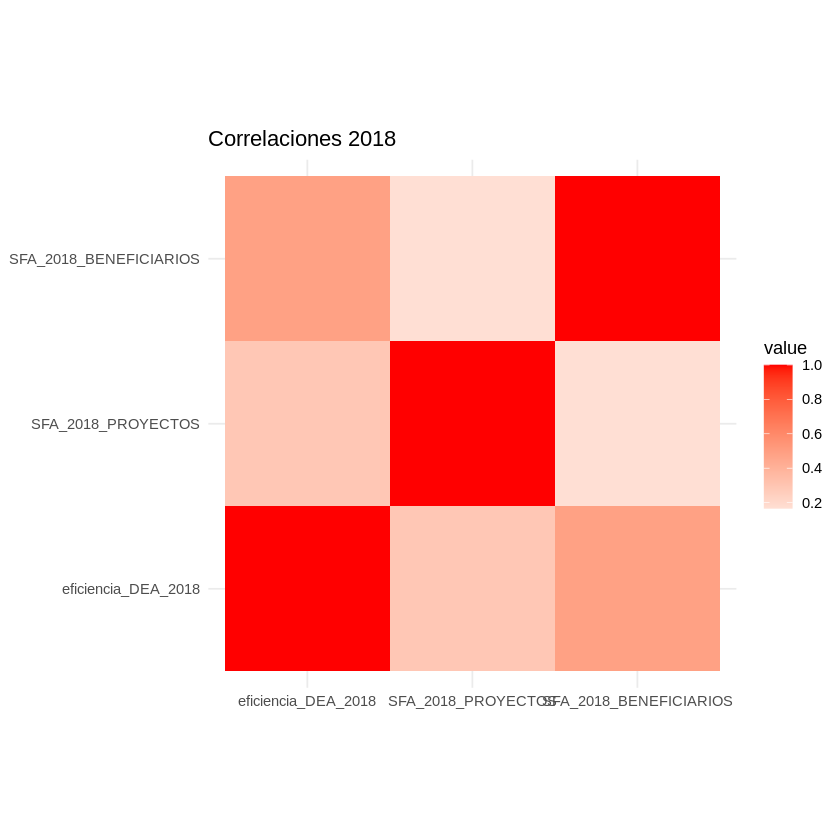

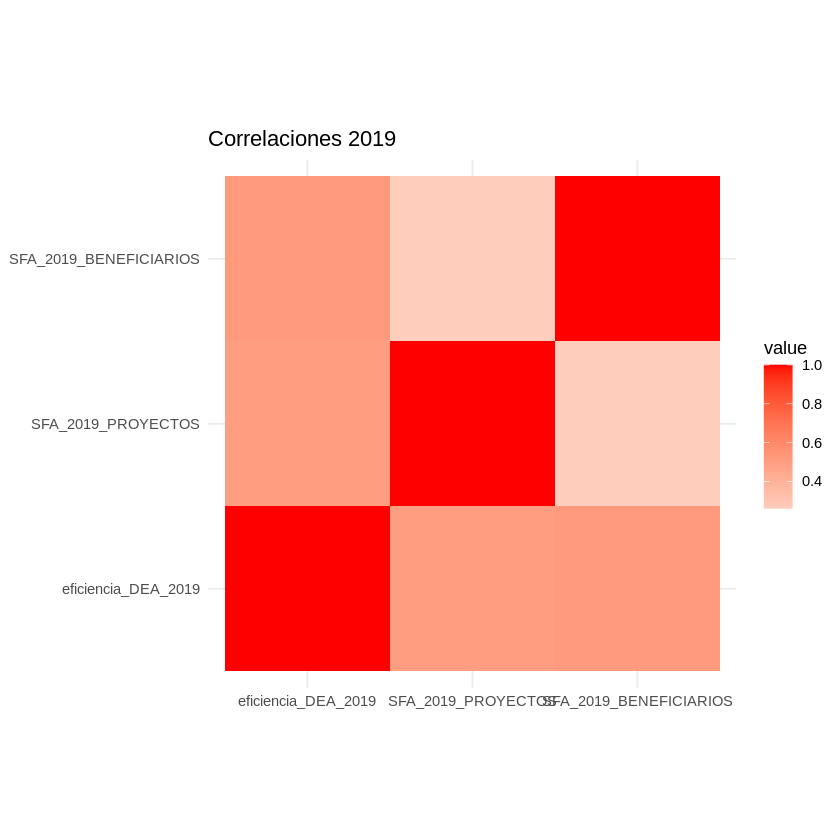

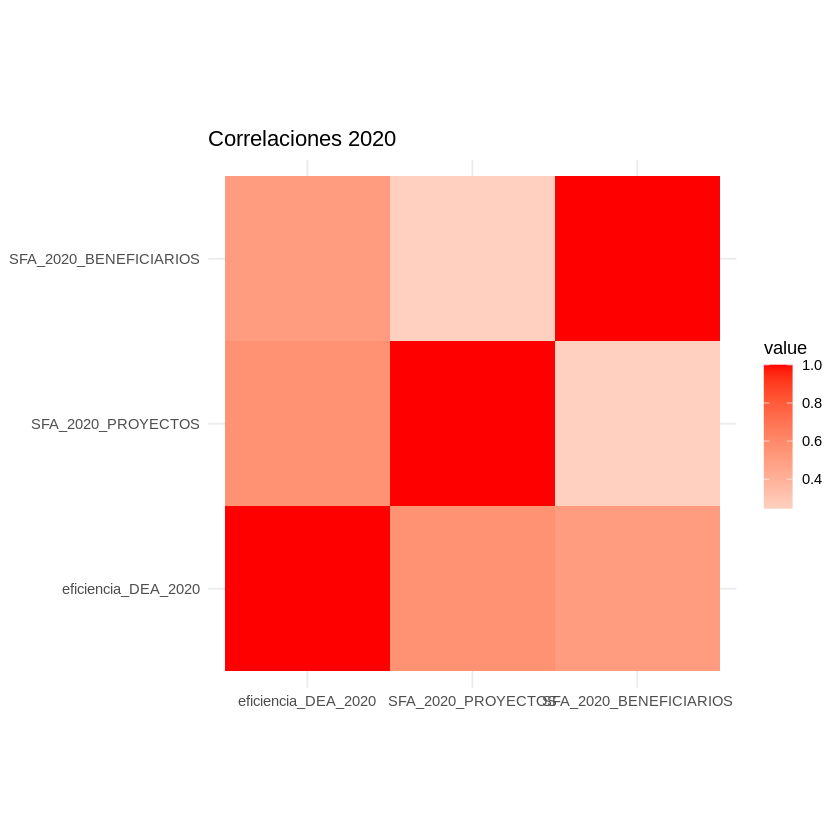

In [ ]:
library(ggplot2)
library(reshape2)

# Función para crear un heatmap de una matriz de correlación
plot_correlation_matrix <- function(cor_matrix, title) {
  melted_cor <- melt(cor_matrix)
  ggplot(melted_cor, aes(Var1, Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
    theme_minimal() +
    labs(title = title, x = NULL, y = NULL) +
    coord_fixed()
}

# Crear y mostrar heatmaps
plot_correlation_matrix(cor_2018, "Correlaciones 2018")
plot_correlation_matrix(cor_2019, "Correlaciones 2019")
plot_correlation_matrix(cor_2020, "Correlaciones 2020")


Warning message:
“Removed 38 rows containing missing values (`geom_point()`).”


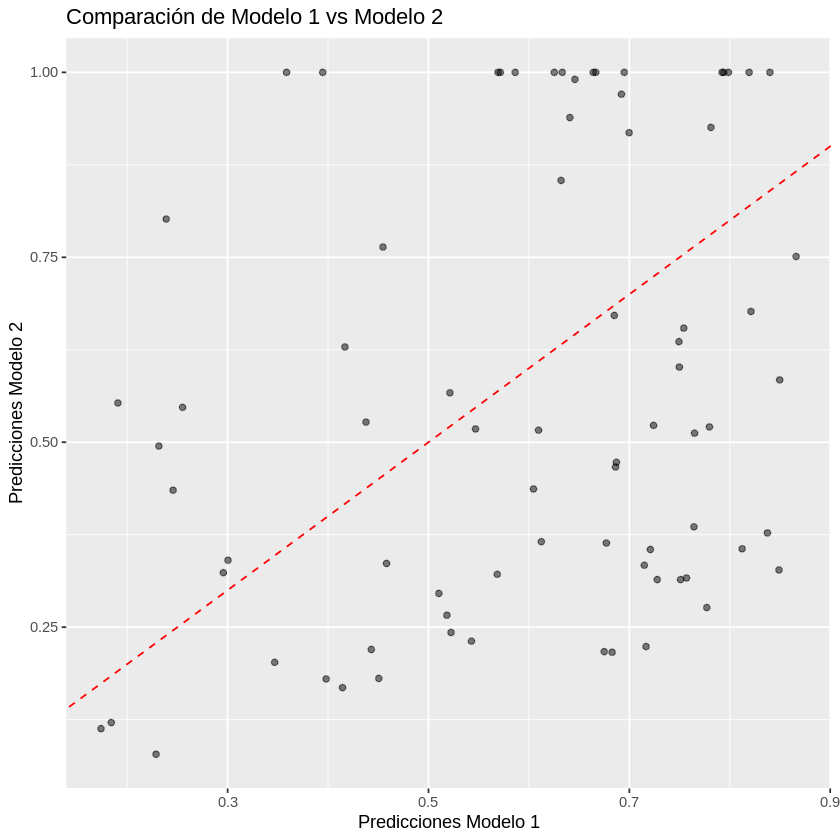

In [ ]:
ggplot(resultados_DEA_SFA, aes(x = SFA_2018_PROYECTOS, y = eficiencia_DEA_2018)) +
  geom_point(alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(title = "Comparación de Modelo 1 vs Modelo 2",
       x = "Predicciones Modelo 1",
       y = "Predicciones Modelo 2")

Warning message:
“Removed 35 rows containing missing values (`geom_point()`).”


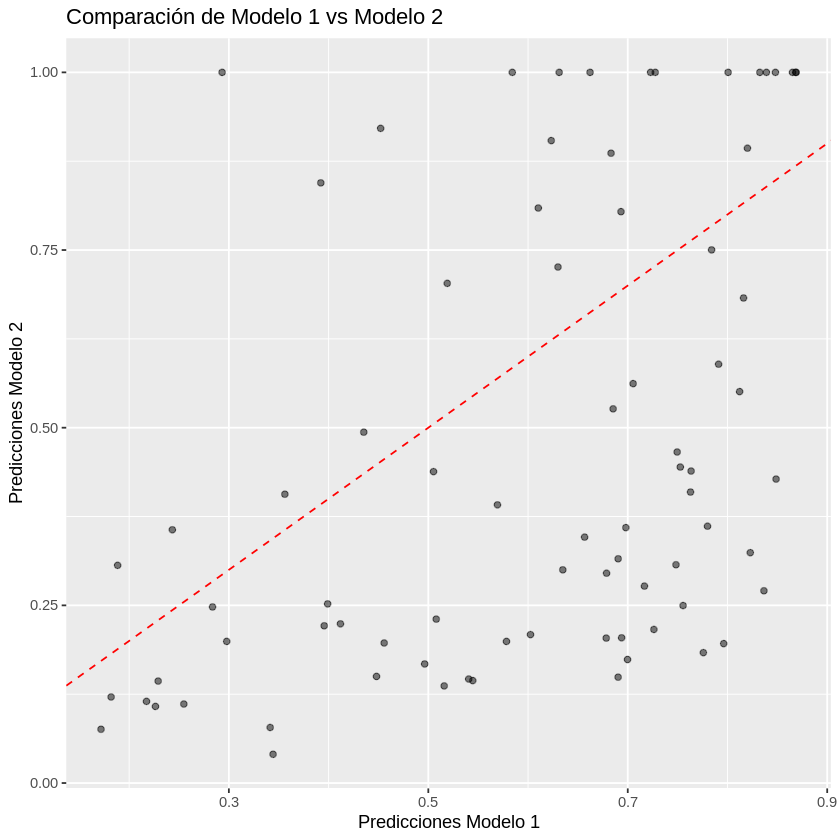

In [ ]:
ggplot(resultados_DEA_SFA, aes(x = SFA_2019_PROYECTOS, y = eficiencia_DEA_2019)) +
  geom_point(alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(title = "Comparación de Modelo 1 vs Modelo 2",
       x = "Predicciones Modelo 1",
       y = "Predicciones Modelo 2")

Warning message:
“Removed 37 rows containing missing values (`geom_point()`).”


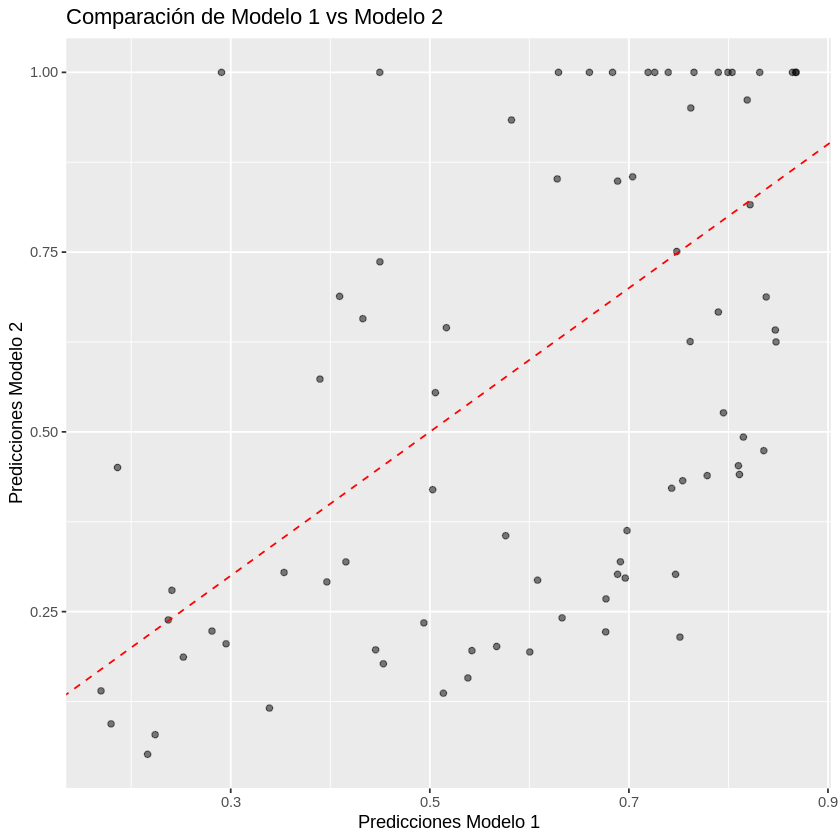

In [ ]:
ggplot(resultados_DEA_SFA, aes(x = SFA_2020_PROYECTOS, y = eficiencia_DEA_2020)) +
  geom_point(alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(title = "Comparación de Modelo 1 vs Modelo 2",
       x = "Predicciones Modelo 1",
       y = "Predicciones Modelo 2")

Graficos

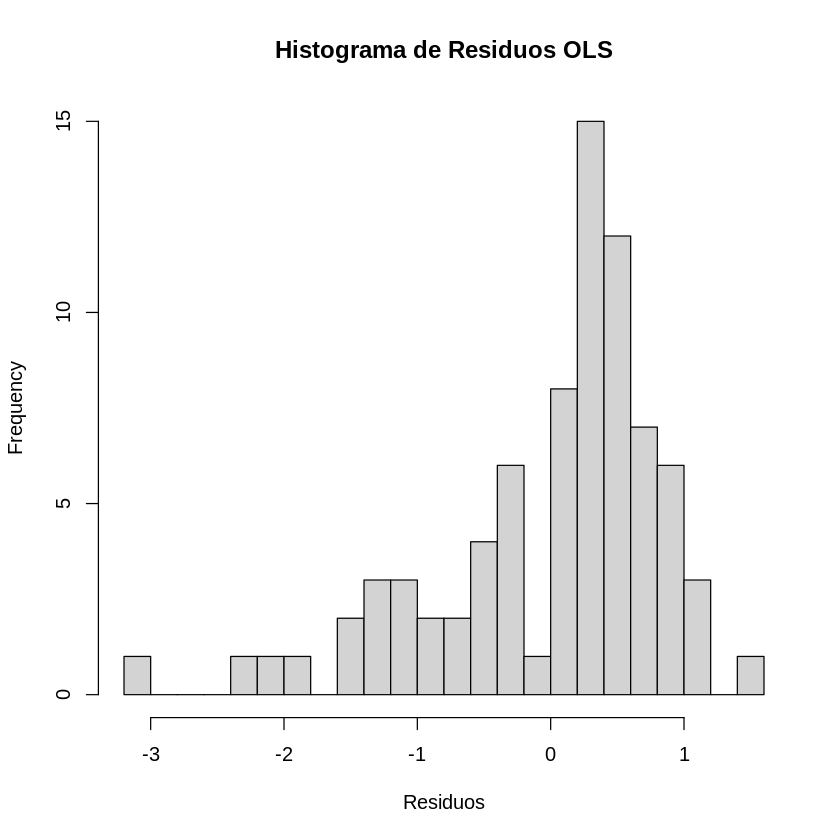

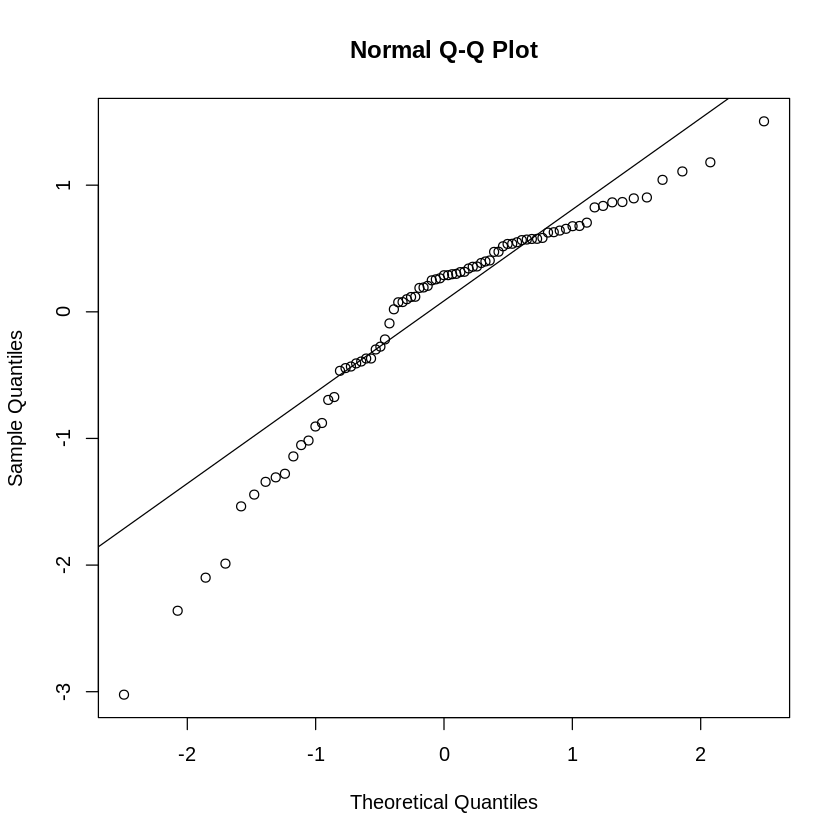

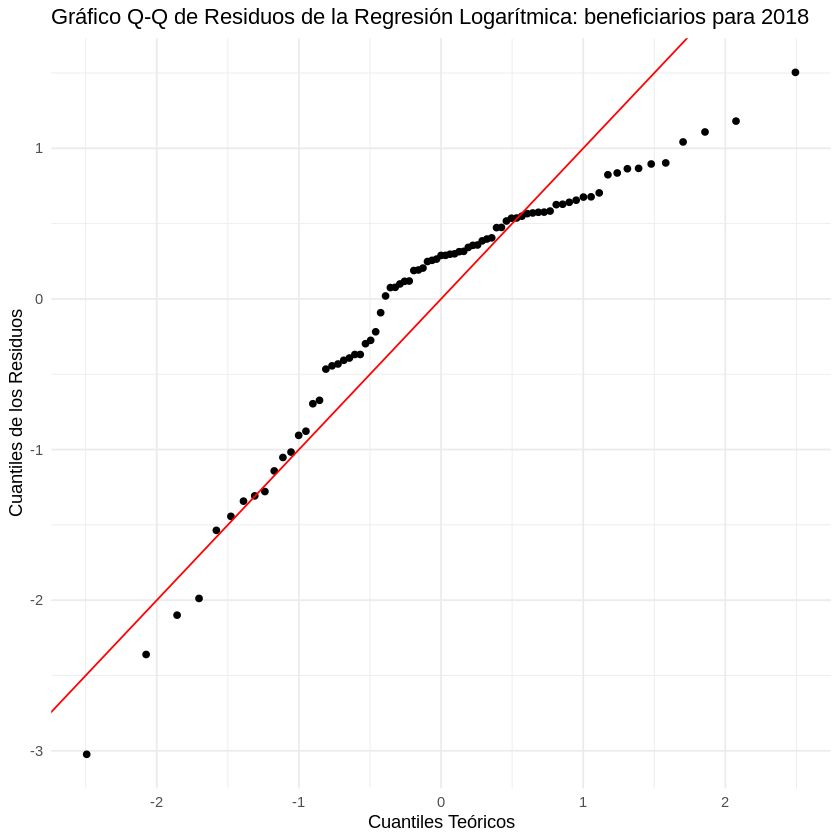

In [ ]:
residuos_ols <- residuals(regresion_log_beneficiarios_19)

# Crear un histograma de los residuos
hist(residuos_ols, breaks = 30, main = "Histograma de Residuos OLS", xlab = "Residuos")

# Gráfico Q-Q para evaluar la normalidad de los residuos
qqnorm(residuos_ols)
qqline(residuos_ols)


qq_data <- data.frame(
  theoretical = qqnorm(residuos_ols, plot.it = FALSE)$x,
  sample = qqnorm(residuos_ols, plot.it = FALSE)$y
)

# Crear el gráfico Q-Q con ggplot2
ggplot(qq_data, aes(x = theoretical, y = sample)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red") +  # Línea teórica de normalidad
  labs(title = "Gráfico Q-Q de Residuos de la Regresión Logarítmica: beneficiarios para 2018",
       x = "Cuantiles Teóricos",
       y = "Cuantiles de los Residuos") +
  theme_minimal()